In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from scipy.optimize import linprog
import numpy as np
import ternary
import matplotlib.pyplot as plt

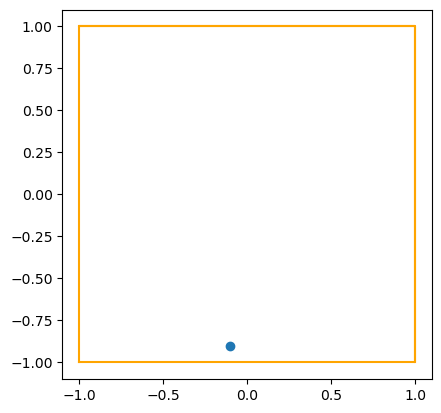

In [91]:
# fixed assumption: A > C
x = -0.1  # x >= 0 <=> A >= B
y = -0.9  # y >= 0 <=> B >= C
phi = np.array([[0,x,1], [-x,0,y], [-1,-y,0]])  # full rank for x,y != 0, x != -y

plt.plot([-1, 1, 1, -1], [-1, -1, 1, 1], [1, 1, -1, -1], [-1, 1, 1, -1], color="orange")
plt.scatter([x], [y])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [92]:
# c = [0, 0, 0]
A_eq = [[1, 1, 1]]
b_eq = [1]
A_ub = phi
b_ub = [0, 0, 0]

# res = linprog(c, A_ub, b_ub, A_eq, b_eq)
# res.x

In [93]:
max_lotts = []

res = linprog([-1, 0, 0], A_ub, b_ub, A_eq, b_eq)
max_lotts += [res.x]
res = linprog([0, -1, 0], A_ub, b_ub, A_eq, b_eq)
max_lotts += [res.x]
res = linprog([0, 0, -1], A_ub, b_ub, A_eq, b_eq)
max_lotts += [res.x]

max_lotts

[array([0.45, 0.5 , 0.05]),
 array([0.45, 0.5 , 0.05]),
 array([0.45, 0.5 , 0.05])]

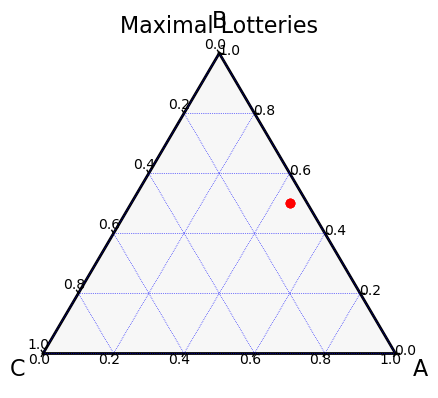

In [95]:
figure, tax = ternary.figure(scale=1)
figure.set_size_inches(5, 4.5)
tax.scatter(max_lotts, color='red')

fontsize = 16
tax.set_title("Maximal Lotteries", fontsize=fontsize)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.2, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=0.2, tick_formats="%.1f")
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.right_corner_label("A", fontsize=fontsize)
tax.top_corner_label("B", fontsize=fontsize)
tax.left_corner_label("C", fontsize=fontsize)